# CRISP - DM Method (Cross-Industry Standard Process for Data Mining)
 The following mnemonic is what I use to remember the order of steps for CRISP - DM Method:
- Barry - Business Understanding
- Drove - Data Understanding
- Directly to the - Data Prep
- Medical - Modelling
- Emergency  - Evaluation
- Department - mDeployment 
___

## 1- Business Understanding

**Scenario**
- Business has approcahed with some data
- They want us to use the data to __forecast transactions__
- The data contains a list of accounting transactions
- Data contains multiple revenue streams
- They want us to make an __app that predict future transactions__
- Data provided is for __3 years__
- Advised data __quality__ is __okay__
___

## 2- Data Understanding

- Lets import pandas library and evaluate the quality of the data at hand

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('regression.csv')

In [3]:
# Lets take a look at the first 5 rows of the data
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [4]:
# Lets take a look at the last 5 rows of the data
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [5]:
# Lets take a look at the info for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


___
### **Notes**
- Looking at the head and tail of the data we can see that the data is from **2019-2021** (3 years of data)
- As you can see that there are total of **7 columns**.
- There are total of **4 categorical variables** (Month, Cost Centre, Account Description, Account type).
- There are **3 numerical variables** (Year, Account, Amount)
- From the data shown we can say for sure that **"Amount"** is our **dependent variable** aka **target variable** and rest of the other variables are **independent variables** aka **features**
- another important thing as we can see is that there are no missing values in the data (woohhf saved a lot of time)

In [6]:
# Lets look for unique values in each columns to see how many categories do we have in each column
# Lets get the names of the columns first
df.columns

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description',
       'Account Type', 'Amount'],
      dtype='object')

In [7]:
# Lets look for unique values in one of the columns first
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001], dtype=int64)

In [8]:
# As you can see there are total 13 unique values in Account column
# Now instead of doing this for every column manually lets iterate through every column to find the unique categories in each column
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


___
### **Notes**
- **Year** column has **3** unique categories
- **Month** column has **12** unique categories
- **Cost Centre** column has **9** unique Categories
- **Account** column has **13** unique categories
- **Account Descriptions** column has **13** unique categories
- **Account Type** column has **4** unique categories
- **Amount** column has **3956** unique values
___

### **Observation**
- The **Month** column can be converted into a numerical column very easily
- **Account** and **Account Description** columns seems similar, maybe we can drop one of the column, but we have to do further analysis to make sure we dont drop any column which can influesnce our model.
- **Account Type** column can be OneHotEncoded very easily as well


In [9]:
# Lets take a look at the spread of the data
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [10]:
# You can see the categorical variable are not shown, if you c=want to include the we can do the following:
df.describe(include = 'all')

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
count,4212.000000,4212,4212,4.212000e+03,4212,4212,4212.000000
unique,NaN,12,9,NaN,13,4,NaN
top,NaN,Jan,CC100,NaN,Product Sales,Expense,NaN
freq,NaN,351,468,NaN,324,1620,NaN
mean,2020.000000,NaN,NaN,2.076925e+06,NaN,NaN,476.470421
std,0.816594,NaN,NaN,9.167528e+05,NaN,NaN,477.296234
min,2019.000000,NaN,NaN,1.000000e+06,NaN,NaN,-1020.000000
25%,2019.000000,NaN,NaN,1.000004e+06,NaN,NaN,268.044500
50%,2020.000000,NaN,NaN,2.000002e+06,NaN,NaN,512.998500
75%,2021.000000,NaN,NaN,3.000000e+06,NaN,NaN,755.960250


In [11]:
# As you can see its not that helpful so we will avoid it
# lets explore data types
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

___
## **Visual Data Exploration**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

___
### **Notes on Strip Plot**
Draw a scatterplot where one variable is categorical.

A strip plot can be drawn on its own, but it is also a good complement
to a box or violin plot in cases where you want to show all observations
along with some representation of the underlying distribution.

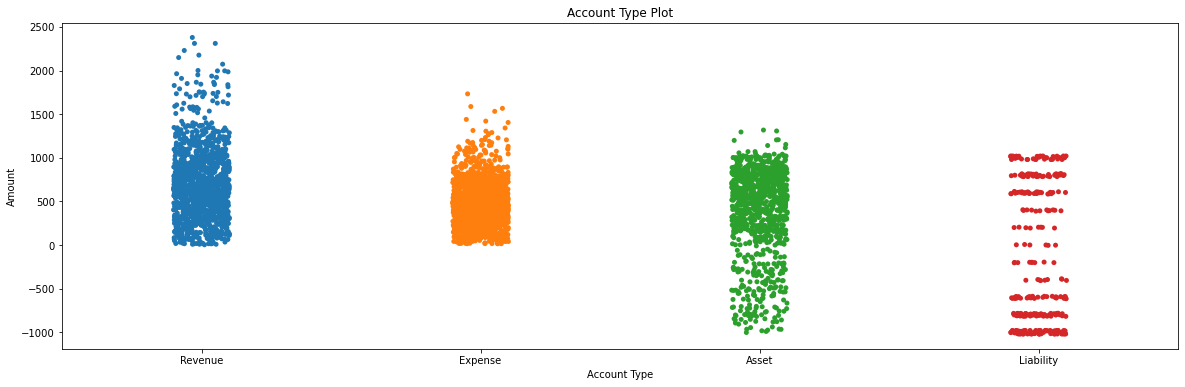

In [13]:
plt.figure(figsize = (20, 6))
sns.stripplot(x = 'Account Type', y = 'Amount', data = df).set_title('Account Type Plot')
plt.show()

___
### **Notes on Violin Plot**
Draw a combination of boxplot and kernel density estimate.

A violin plot plays a similar role as a box and whisker plot. It shows the
distribution of quantitative data across several levels of one (or more)
categorical variables such that those distributions can be compared. Unlike
a box plot, in which all of the plot components correspond to actual
datapoints, the violin plot features a kernel density estimation of the
underlying distribution.

This can be an effective and attractive way to show multiple distributions
of data at once, but keep in mind that the estimation procedure is
influenced by the sample size, and violins for relatively small samples
might look misleadingly smooth.

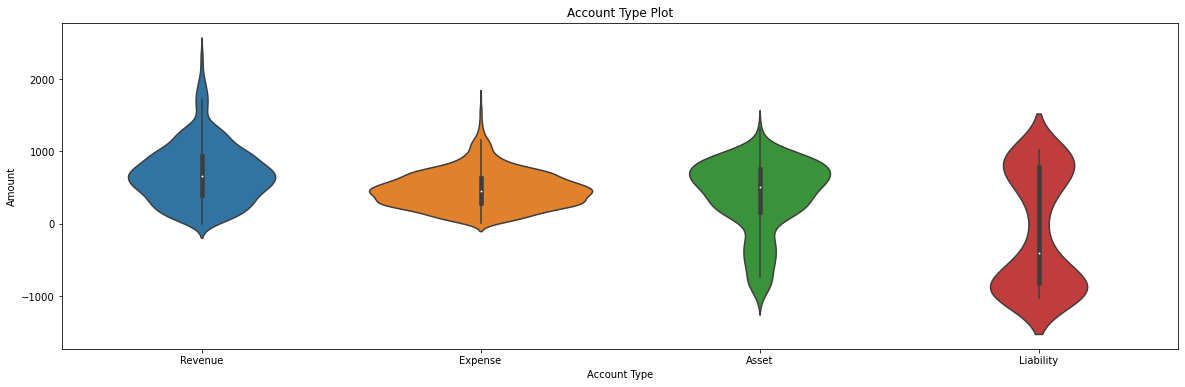

In [14]:
plt.figure(figsize = (20, 6))
sns.violinplot(x = 'Account Type', y = 'Amount', data = df).set_title('Account Type Plot')
plt.show()

___
### **Notes from the Plots**

- As you can see **Revenue, Expense and Asset** account types are distributed around their median value 
- Whereas **Liability** account type has a big spread of values and their median value is negative
- This tells us a little bit more about our data, we might investigate why the distribution of Liability is different

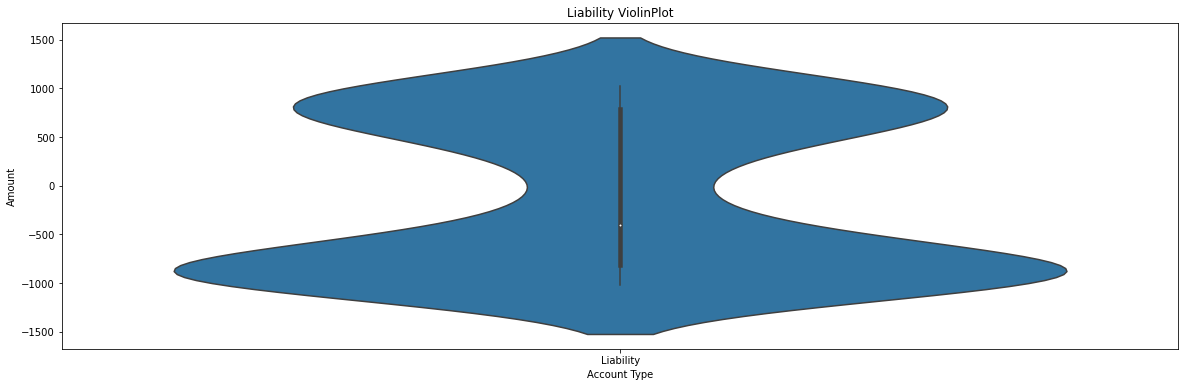

In [15]:
# Lets zoom into the liability acount specifically
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability ViolinPlot')
plt.show()

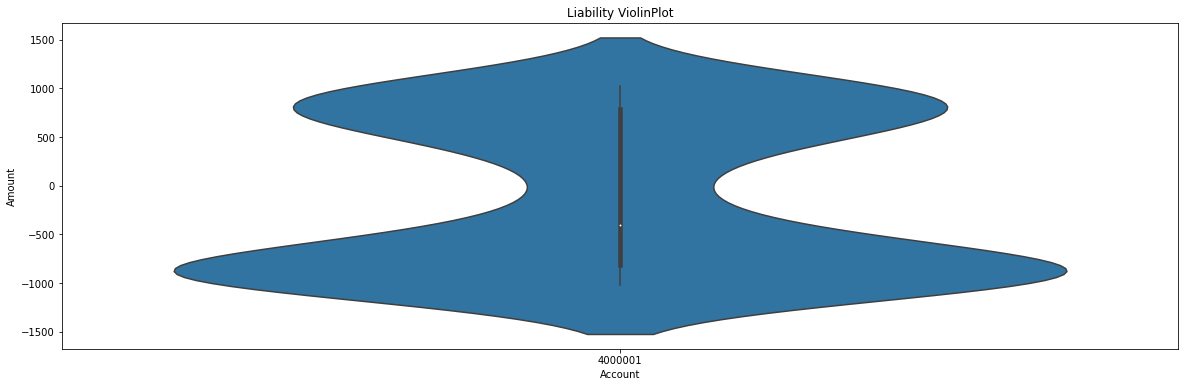

In [16]:
# Lets see which Account or Accounts are giving this distribution
plt.figure(figsize=(20,6))
sns.violinplot(x='Account', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability ViolinPlot')
plt.show()

___
### **Notes**

- There is only one liability account and that is 4000001 so we need to keep that in mind

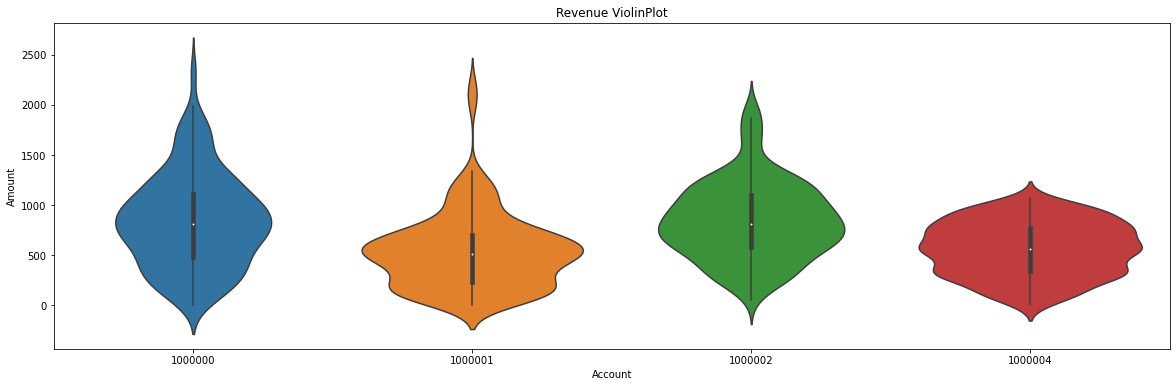

In [17]:
# Now lets explore other account types
plt.figure(figsize=(20,6))
sns.violinplot(x='Account', y='Amount', data=df[df['Account Type']=='Revenue']).set_title('Revenue ViolinPlot')
plt.show()

___
### **Notes**

- As we can see we have multiple revenue accounts
- Now lets see if Account and Accounts Description give you a different distribution for revenue, if its same we can assume that both are telling you the same thing and we can drop one of it, may be **Account Description**

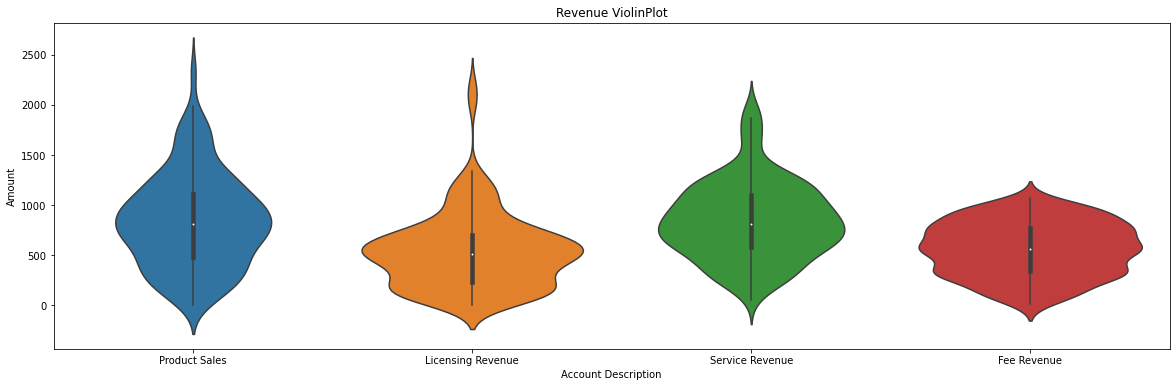

In [18]:
# Now we compare the distribution of Revenue with Account and Account Description
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue']).set_title('Revenue ViolinPlot')
plt.show()

___
### **Notes**

- Account and Account Description tell you the same story so we can drop Account Description

___
## **Review Trends**

- Now we are gonna take a look at the trend in the data 
- For that we are gonna have to look at the trend across the years
- we will convert our date columns in to datetime object

In [19]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [20]:
# Lets make a month map dictionary
monthmap = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

In [21]:
df['Period'] = df['Month'].apply(lambda x: monthmap[x])

In [22]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1


In [23]:
df['Day'] = 1

In [24]:
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)

In [25]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-1-1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-1-1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-1-1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-1-1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-1-1


In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

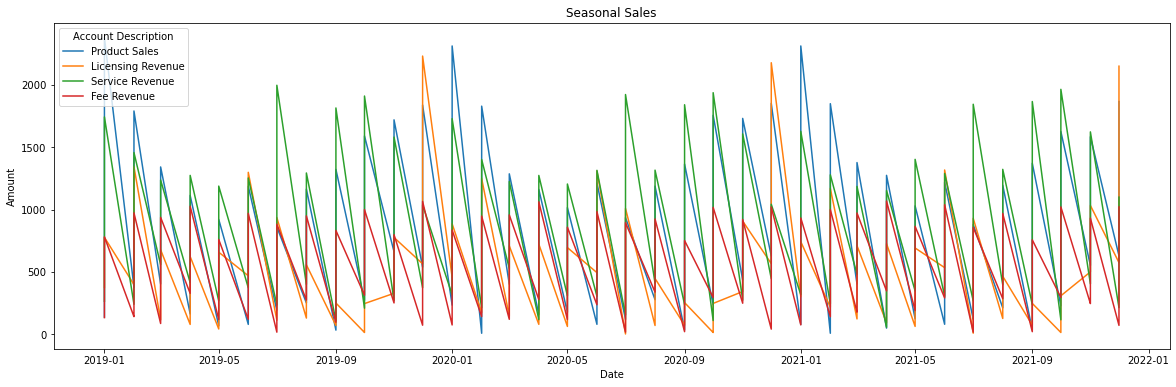

In [28]:
# Plotting trend of Amount over time for the Revenue account
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')
plt.show()

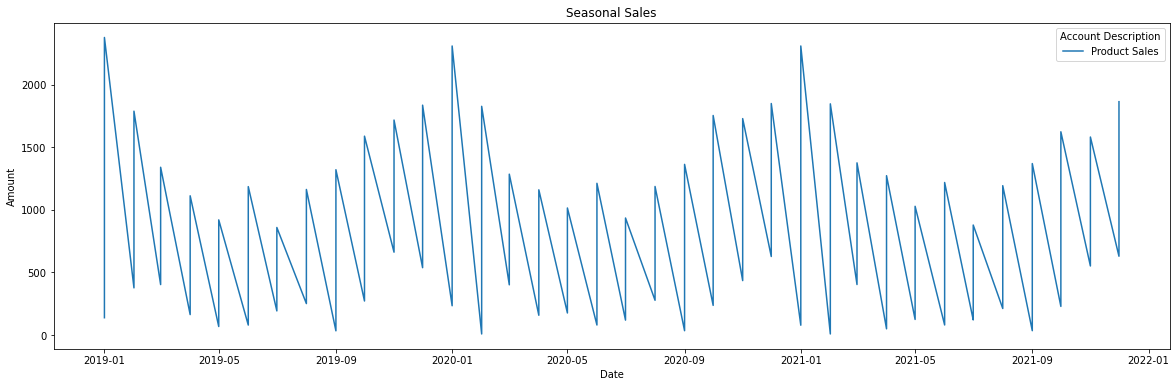

In [29]:
# Lets look at Product Sales
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Product Sales']).set_title('Seasonal Sales')
plt.show()

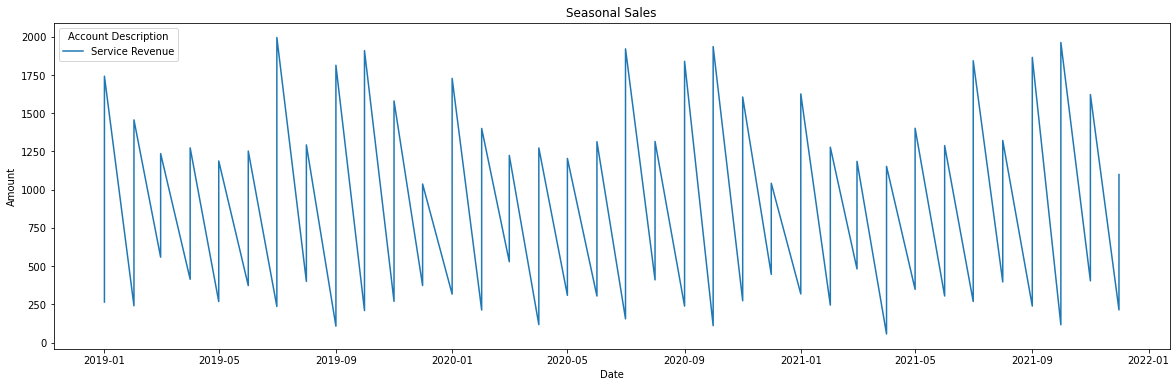

In [30]:
# Lets look at Service Revenue
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Service Revenue']).set_title('Seasonal Sales')
plt.show()

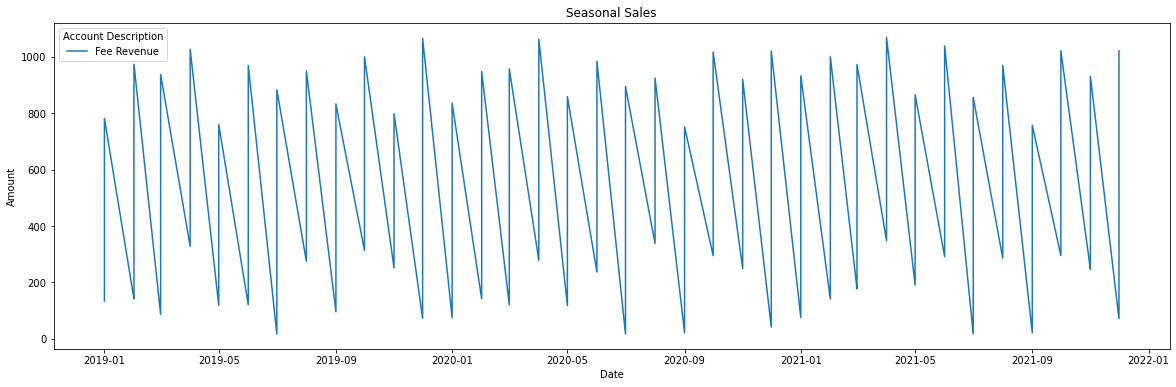

In [31]:
# Lets look at Fee Revenue
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Fee Revenue']).set_title('Seasonal Sales')
plt.show()

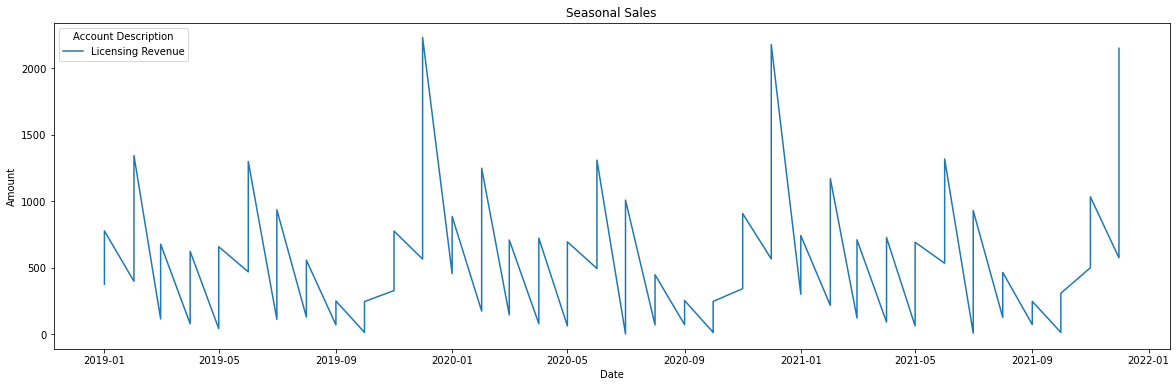

In [32]:
# Lets look at Licensing Revenue
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Licensing Revenue']).set_title('Seasonal Sales')
plt.show()

___
### **Notes**
- As you can see that there is some sort of seasonality shown by the revenue accounts but we will focus on the data from regression point of view and will do the time series analysis maybe in the future


___
## **Correlation**

- Now we are gonna look at the correlation matrix so that we can select features for our data preparation phase

In [33]:
df.corr()

,Year,Account,Amount,Period,Day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [34]:
# We want to look at the correlation between accounts, since they are in one single account we have to do it differently 
# as you can see as above that the correlation does not mean anything
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [35]:
# Lets Encode the Account column using OneHot Encoding using get_dummies
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,0,0,0,0,0,0,1,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,1,0,0,0
4209,0,0,0,0,0,0,0,0,0,0,1,0,0
4210,0,0,0,0,0,0,0,0,0,0,0,1,0


In [37]:
# Now we are gonna join the dummy df and our original df
corr_dict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corr_dict[key] = {int(row['Account']): row['Amount']}

In [38]:
corr_df = pd.DataFrame.from_dict(corr_dict).T.fillna(0)

In [39]:
corr_df.head()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1344.051,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,480.968,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.000,650.82,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.000,0.00,339.36,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.000,0.00,0.00,1125.328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
corr_df.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


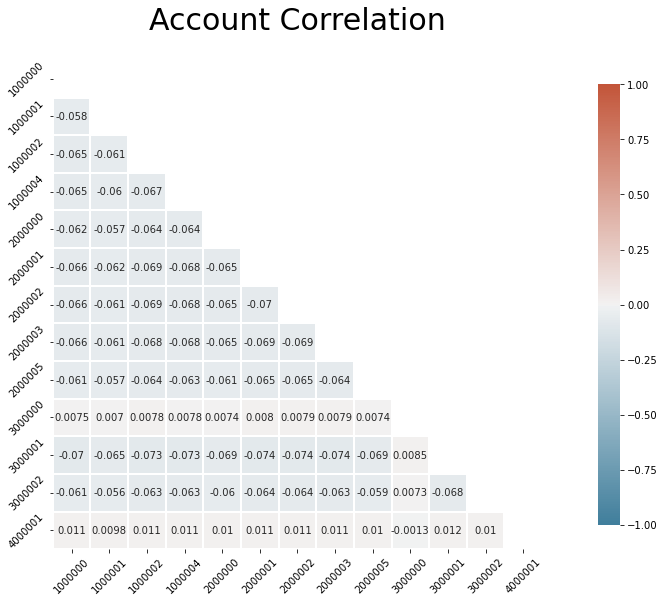

In [41]:
# Its not pretty and difficult to read
# Lets make a heatmap

import numpy as np

# Compute the correlation matrix
corr = corr_df.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 9))                    # Set figure size

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask 
sns.heatmap(corr, 
            mask = mask, 
            cmap = cmap, 
            vmax = 1,                                      # Set scale min value
            vmin = -1,                                     # Set scale min value
            center = 0,                                    # Set scale min value
            square = True,                                 # Ensure perfect squares
            linewidths = 1.5,                              # Set linewidth between squares
            cbar_kws = {"shrink": .9},                     # Set size of color bar
            annot = True                                   # Include values within squares
           );

plt.xticks(rotation=45)                                    # Rotate x labels
plt.yticks(rotation=45)                                    # Rotate y labels
# plt.xlabel('X Axis Title', size=20)                      # Set x axis title
# plt.ylabel('Y Axis Title', size=20)                      # Set y axis title
plt.title('Account Correlation', size=30, y=1.05);   # Set plot title and position

## **3- Data Preparation**

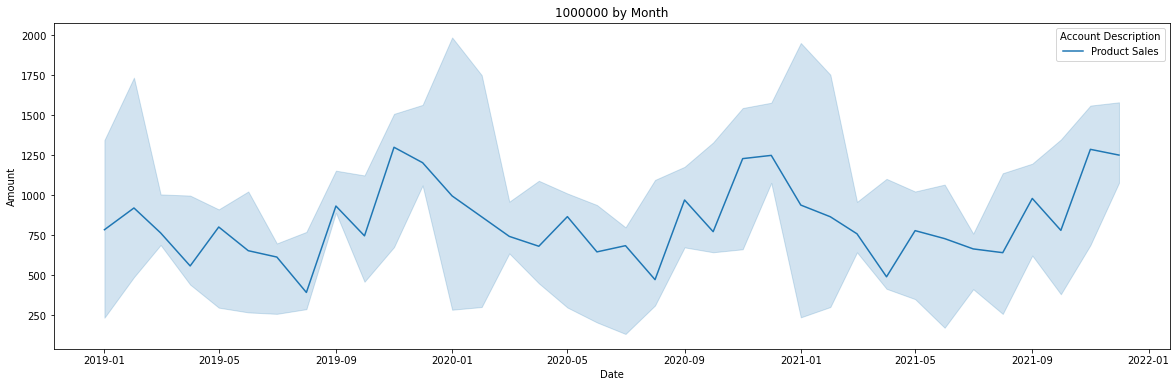

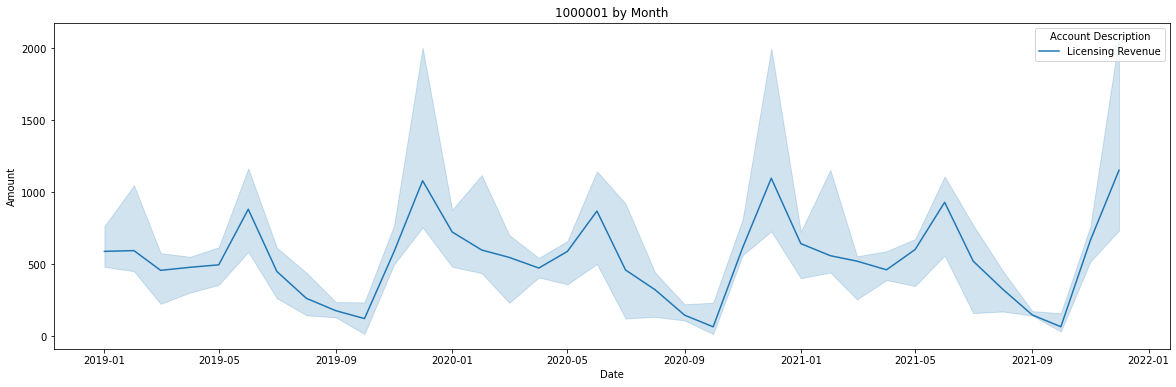

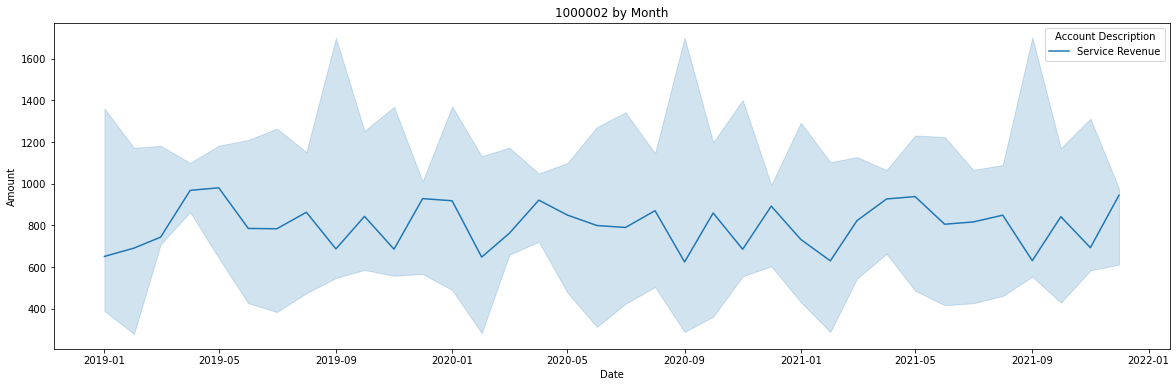

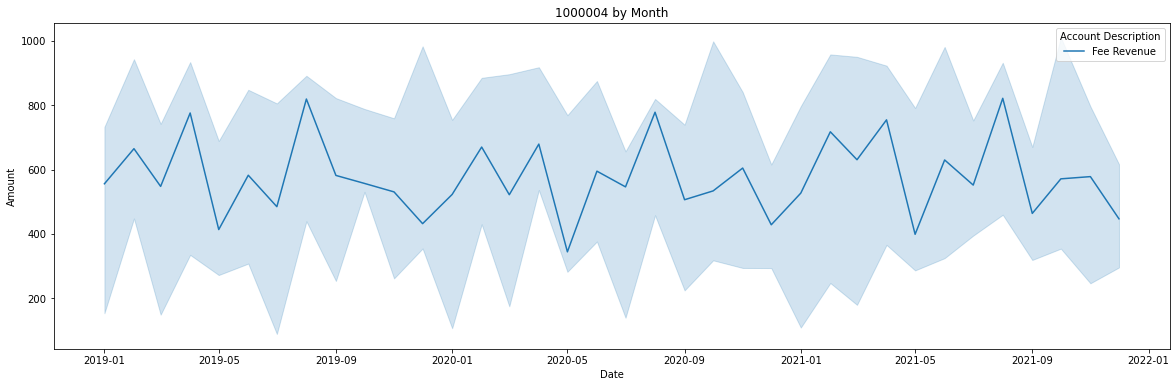

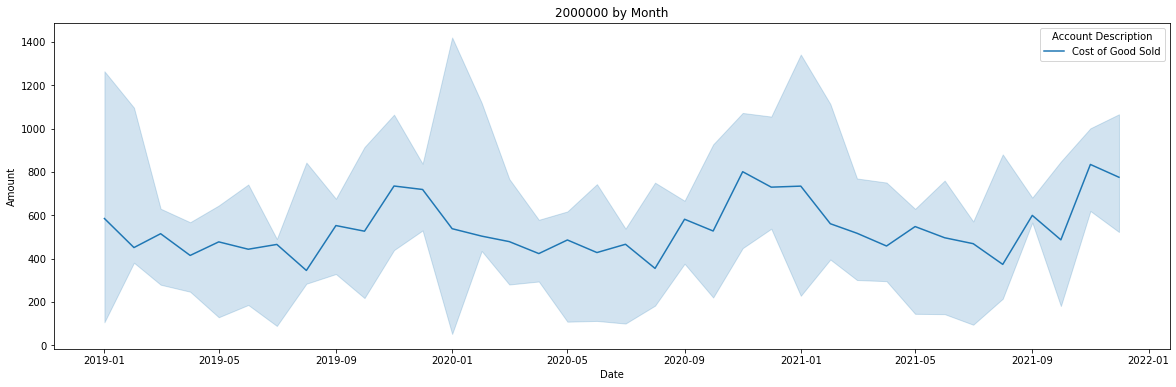

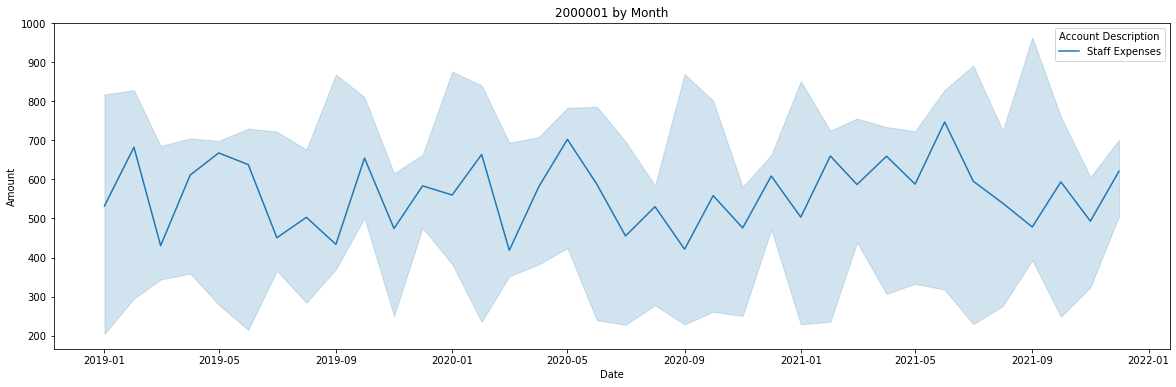

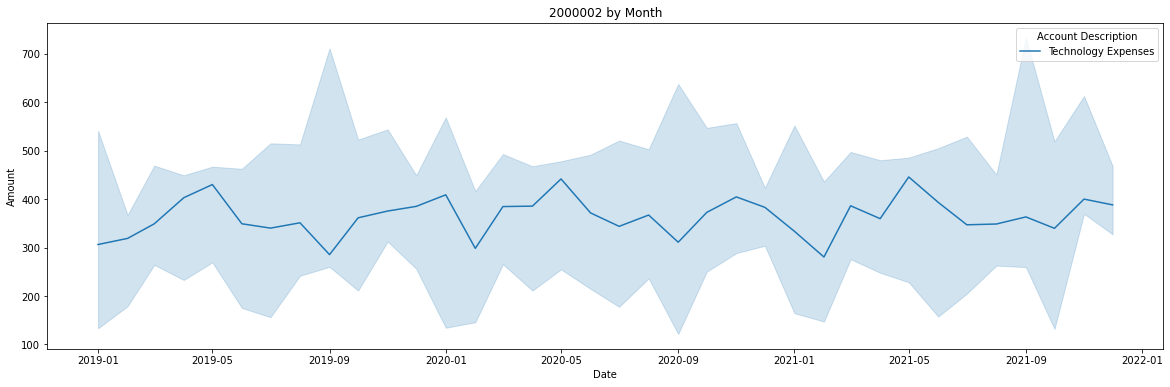

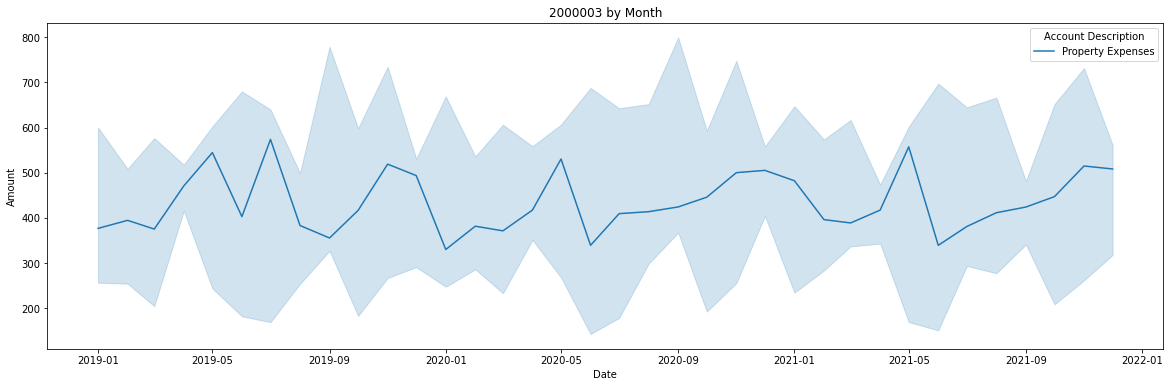

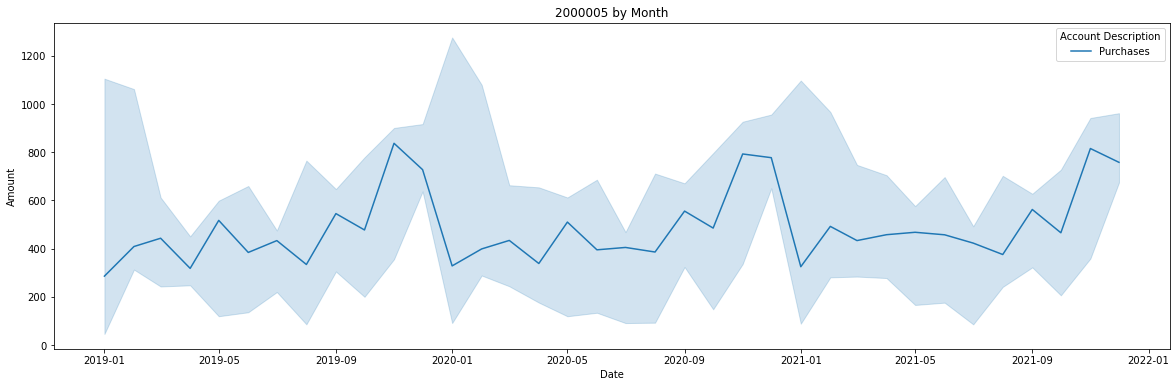

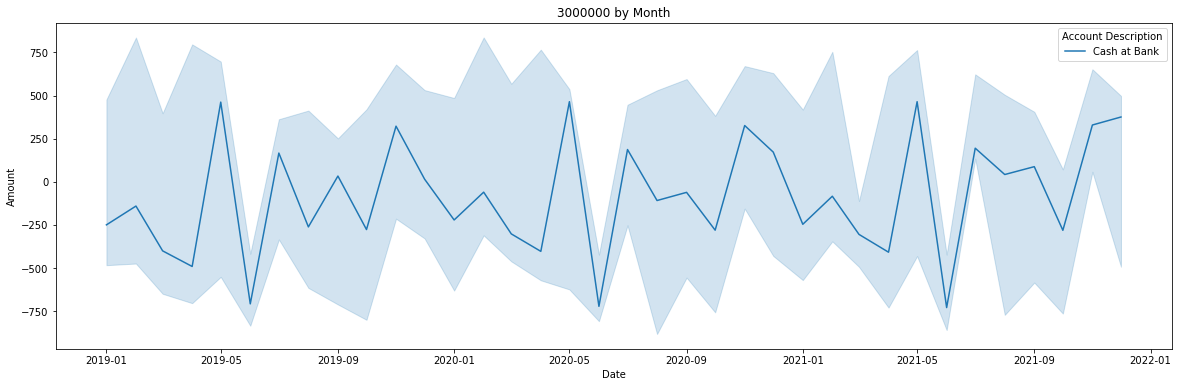

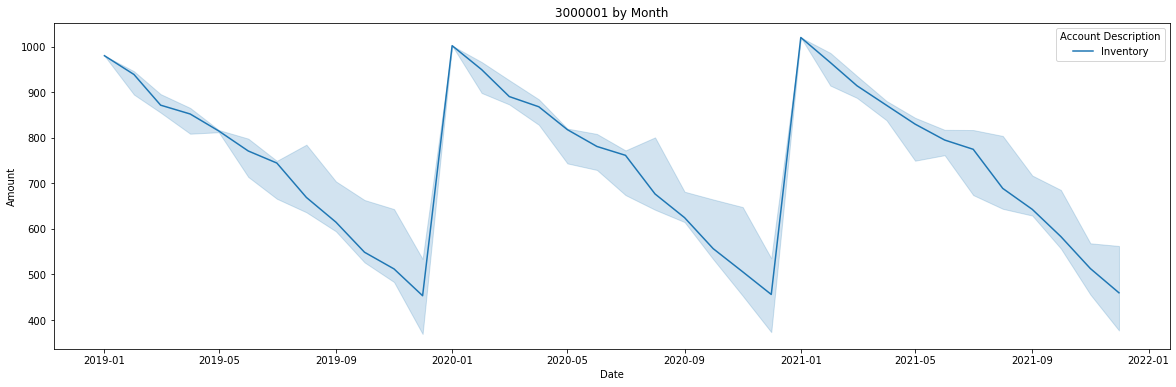

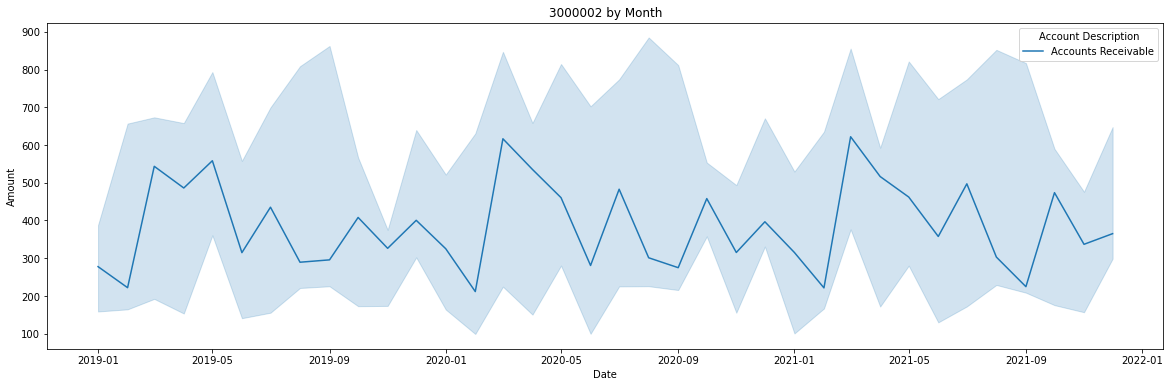

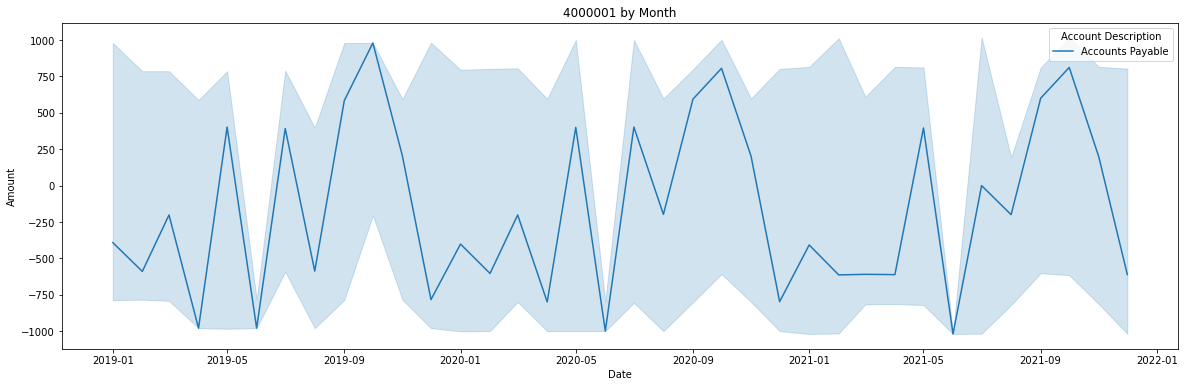

In [42]:
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
    plt.show()

### **Correcting the Data Types**

In [44]:
# Checking for current dtypes
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [47]:
df = df.astype(str)

In [48]:
df.dtypes

Year                   object
Month                  object
Cost Centre            object
Account                object
Account Description    object
Account Type           object
Amount                 object
Period                 object
Day                    object
Date                   object
dtype: object

In [49]:
df['Amount'] = df['Amount'].astype(float)

In [50]:
df.dtypes

Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
Period                  object
Day                     object
Date                    object
dtype: object

### **Lets Drop the Period, Day and Date fields**
- We created these feilds to do the analysis now we dont need them

In [52]:
df.drop(['Period', 'Day', 'Date'], axis = 1, inplace=True)

In [53]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [54]:
df.dtypes

Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
dtype: object

### **Drop Similar Columns**
- **Account** and **Account Description** are similar so we will drop **Account Description**

In [55]:
df.drop(['Account Description'], axis = 1, inplace=True)

In [56]:
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,1000000,Revenue,1344.051
1,2019,Jan,CC100,1000001,Revenue,480.968
2,2019,Jan,CC100,1000002,Revenue,650.820
3,2019,Jan,CC100,1000004,Revenue,339.360
4,2019,Jan,CC100,2000000,Expense,1125.328


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          4212 non-null   object 
 1   Month         4212 non-null   object 
 2   Cost Centre   4212 non-null   object 
 3   Account       4212 non-null   object 
 4   Account Type  4212 non-null   object 
 5   Amount        4212 non-null   float64
dtypes: float64(1), object(5)
memory usage: 197.6+ KB


## **Lets do OneHot Encoding of all Categorical Variables**

In [62]:
df = pd.get_dummies(df)
df.head()

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_2000003,Account_2000005,Account_3000000,Account_3000001,Account_3000002,Account_4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
# Lets check the dtypes
df.dtypes

Amount                    float64
Year_2019                   uint8
Year_2020                   uint8
Year_2021                   uint8
Month_Apr                   uint8
Month_Aug                   uint8
Month_Dec                   uint8
Month_Feb                   uint8
Month_Jan                   uint8
Month_Jul                   uint8
Month_Jun                   uint8
Month_Mar                   uint8
Month_May                   uint8
Month_Nov                   uint8
Month_Oct                   uint8
Month_Sep                   uint8
Cost Centre_CC100           uint8
Cost Centre_CC101           uint8
Cost Centre_CC102           uint8
Cost Centre_CC200           uint8
Cost Centre_CC201           uint8
Cost Centre_CC202           uint8
Cost Centre_CC300           uint8
Cost Centre_CC301           uint8
Cost Centre_CC302           uint8
Account_1000000             uint8
Account_1000001             uint8
Account_1000002             uint8
Account_1000004             uint8
Account_200000

## **4- Modelling**

In [63]:
# Separating our features and targets
X = df.drop('Amount', axis = 1)
y = df['Amount']

In [64]:
X.head()

,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,...,Account_2000003,Account_2000005,Account_3000000,Account_3000001,Account_3000002,Account_4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
y.head()

0    1344.051
1     480.968
2     650.820
3     339.360
4    1125.328
Name: Amount, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split